In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('2324data.csv')
df.head()

,URL,Unique Clicks,Total Clicks,% of Sent,% of Views,Date
0,https://awginc1.box.com/s/14uktcahn8fb77gt8zno...,136,339,3.30%,30.20%,7/5/2023
1,https://awgincpromotions.my.salesforce-sites.c...,56,86,1.40%,7.70%,7/5/2023
2,https://awginc1.app.box.com/s/jvfk2ndjhwf72jur...,20,54,0.50%,4.80%,7/5/2023
3,https://awginc1.box.com/s/csnxppp31eye0p93wcc9...,35,47,0.90%,4.20%,7/5/2023
4,https://awginc1.box.com/s/aip9t3mx8nirbumlfgxx...,24,44,0.60%,3.90%,7/5/2023


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


In [ ]:
ctr_2023 = df[df['Year'] == 2023]['Total Clicks']
ctr_2024 = df[df['Year'] == 2024]['Total Clicks']

In [ ]:
summary_stats = pd.DataFrame({
    "Year": [2023, 2024],
    "Mean Total Clicks": [ctr_2023.mean(), ctr_2024.mean()],
    "Median Total Clicks": [ctr_2023.median(), ctr_2024.median()],
    "Std Dev": [ctr_2023.std(), ctr_2024.std()]
})

print(summary_stats)

   Year  Mean Total Clicks  Median Total Clicks    Std Dev
0  2023          30.700855                 11.0  57.552993
1  2024          21.627294                  9.0  45.451489


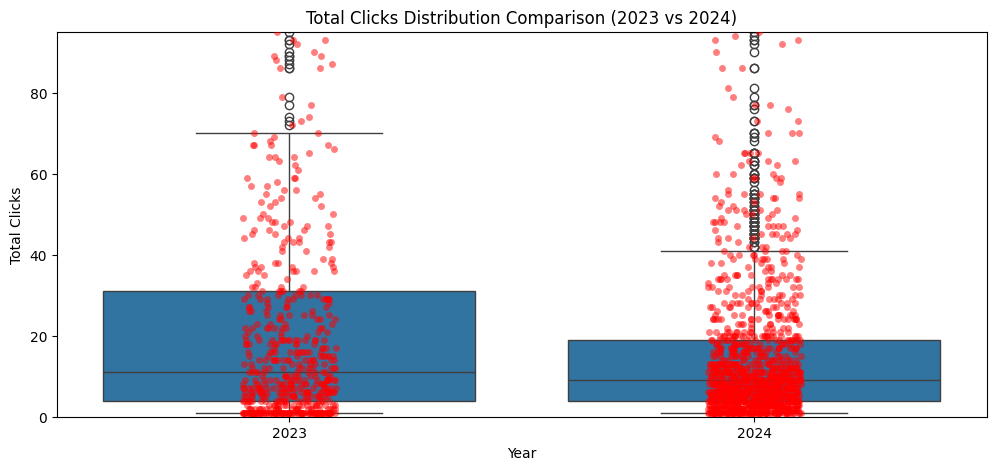

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Year'], y=df['Total Clicks'])
sns.stripplot(x=df['Year'], y=df['Total Clicks'], color='red', alpha=0.5, jitter=True)
plt.title("Total Clicks Distribution Comparison (2023 vs 2024)")
plt.xlabel("Year")
plt.ylabel("Total Clicks")
plt.ylim(0, df['Total Clicks'].quantile(0.95))
plt.show()

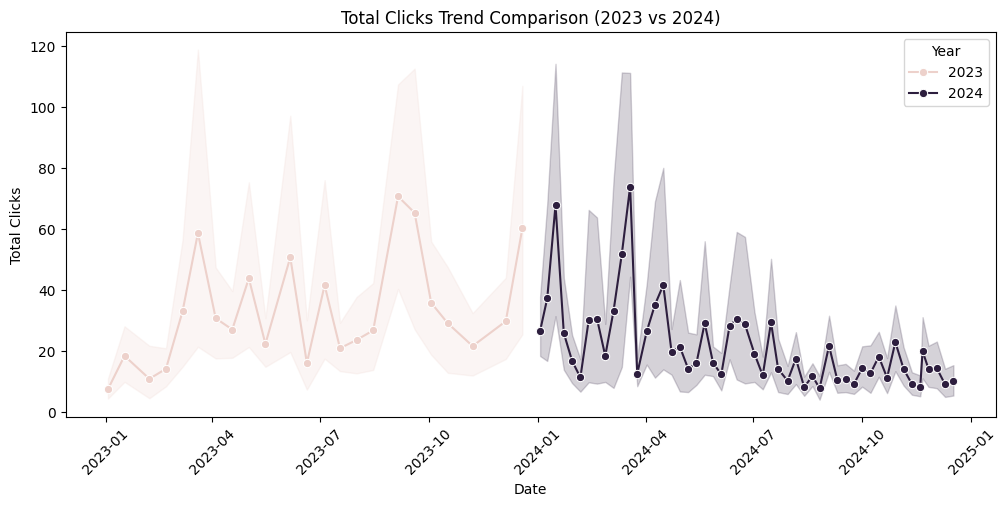

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='Total Clicks', hue='Year', marker='o')
plt.title("Total Clicks Trend Comparison (2023 vs 2024)")
plt.xlabel("Date")
plt.ylabel("Total Clicks")
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)
top_10_2023 = df[df['Year'] == 2023][['Date', 'URL', 'Total Clicks']].sort_values(by='Total Clicks', ascending=False).head(10)
top_10_2024 = df[df['Year'] == 2024][['Date', 'URL', 'Total Clicks']].sort_values(by='Total Clicks', ascending=False).head(10)

print("Top 10 websites by Total Clicks (2023):")
print(top_10_2023.to_string(index=False))
print("Top 10 websites by Total Clicks (2024):")
print(top_10_2024.to_string(index=False))

Top 10 websites by Total Clicks (2023):
      Date                                                                                                                                             URL  Total Clicks
2023-09-19 https://ecomm-sd.com/catalogsearch/result/?utm_medium=email&q=milk+channel+strip&utm_source=emfluence&utm_campaign=3_16_AWG_Retailer_Newsletter           532
2023-03-20      https://awginc1.box.com/s/71tar2gaeb61ky1a9muvrmmjjq1dfwm5?utm_medium=email&utm_source=emfluence&utm_campaign=3_16_AWG_Retailer_Newsletter           443
2023-06-06      https://awginc1.box.com/s/tr2v1c1l7czigyolyzwtfvzk7jxa9h7r?utm_medium=email&utm_source=emfluence&utm_campaign=3_16_AWG_Retailer_Newsletter           423
2023-09-19      https://awginc1.box.com/s/ng0ggerudvxjnlc40z48w5wttjff4nqw?utm_medium=email&utm_source=emfluence&utm_campaign=3_16_AWG_Retailer_Newsletter           374
2023-12-19      https://awginc1.box.com/s/49tm2nnf8w1saic2oof484ldr5jynyzd?utm_medium=email&utm_source=emfluence&ut

<ipython-input-10-0d7b071a31f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_2023['URL'], x=top_10_2023['Total Clicks'], palette='Blues_r')


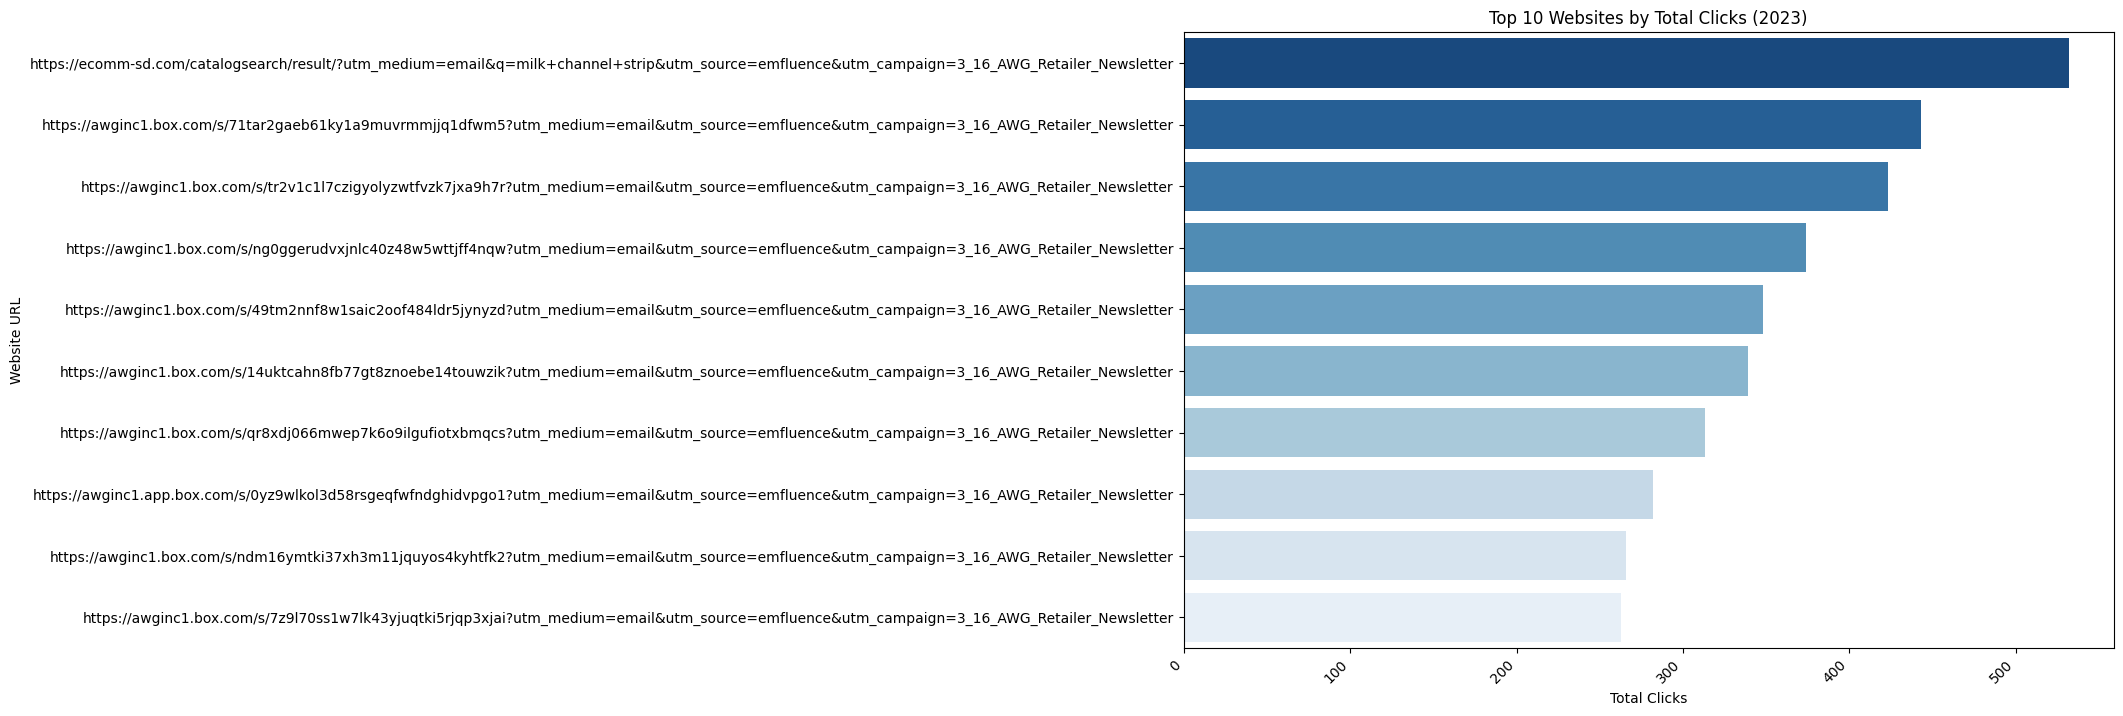

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_2023['URL'], x=top_10_2023['Total Clicks'], palette='Blues_r')
plt.title("Top 10 Websites by Total Clicks (2023)")
plt.xlabel("Total Clicks")
plt.ylabel("Website URL")
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()

<ipython-input-11-80097dbec2dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_2024['URL'], x=top_10_2024['Total Clicks'], palette='Reds_r')


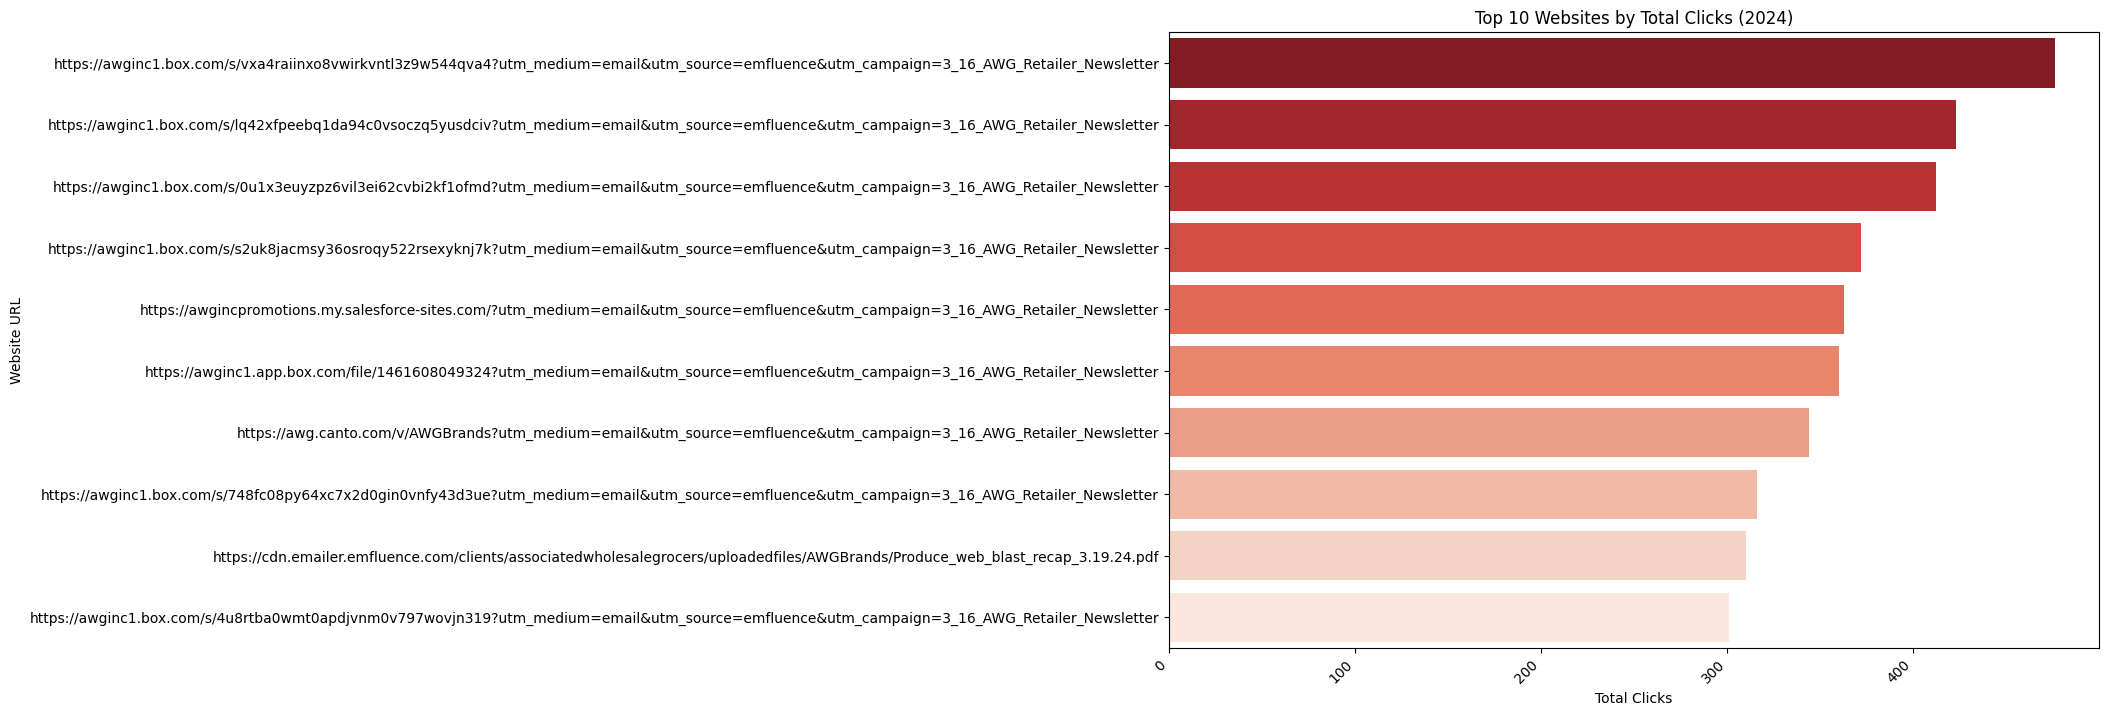

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_2024['URL'], x=top_10_2024['Total Clicks'], palette='Reds_r')
plt.title("Top 10 Websites by Total Clicks (2024)")
plt.xlabel("Total Clicks")
plt.ylabel("Website URL")
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()

In [ ]:
t_stat, p_value = ttest_ind(ctr_2023, ctr_2024, nan_policy='omit')
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in Total Clicks between 2023 and 2024.")
else:
    print("No significant difference in Total Clicks between 2023 and 2024.")

T-test results: t-statistic = 3.6516, p-value = 0.0003
Significant difference in Total Clicks between 2023 and 2024.


In [ ]:
pd.set_option('display.max_colwidth', None)

# Get the least performing URLs (bottom 10) for 2023 and 2024 based on Total Clicks
least_10_2023 = df[df['Year'] == 2023][['Date', 'URL', 'Total Clicks']].sort_values(by='Total Clicks', ascending=True).head(10)
least_10_2024 = df[df['Year'] == 2024][['Date', 'URL', 'Total Clicks']].sort_values(by='Total Clicks', ascending=True).head(10)

print("Least Performing 10 Websites by Total Clicks (2023):")
print(least_10_2023.to_string(index=False))
print("Least Performing 10 Websites by Total Clicks (2024):")
print(least_10_2024.to_string(index=False))


Least Performing 10 Websites by Total Clicks (2023):
      Date                                                                                                                                                   URL  Total Clicks
2023-02-21    https://awginc1.box.com/s/obkm0cn2dxqethom8jxnrw787ycw92y8?utm_medium=email&amp;utm_source=emfluence&amp;utm_campaign=3_16_AWG_Retailer_Newsletter             1
2023-03-07                                                                                                                              System Link: Unsubscribe             1
2023-10-03                                                                                                                              System Link: Unsubscribe             1
2023-10-03                              https://www.facebook.com/bestchoicebrand?utm_medium=email&utm_source=emfluence&utm_campaign=3_16_AWG_Retailer_Newsletter             1
2023-10-03              https://www.youtube.com/channel/UCDBn16FR4Hqz9_o

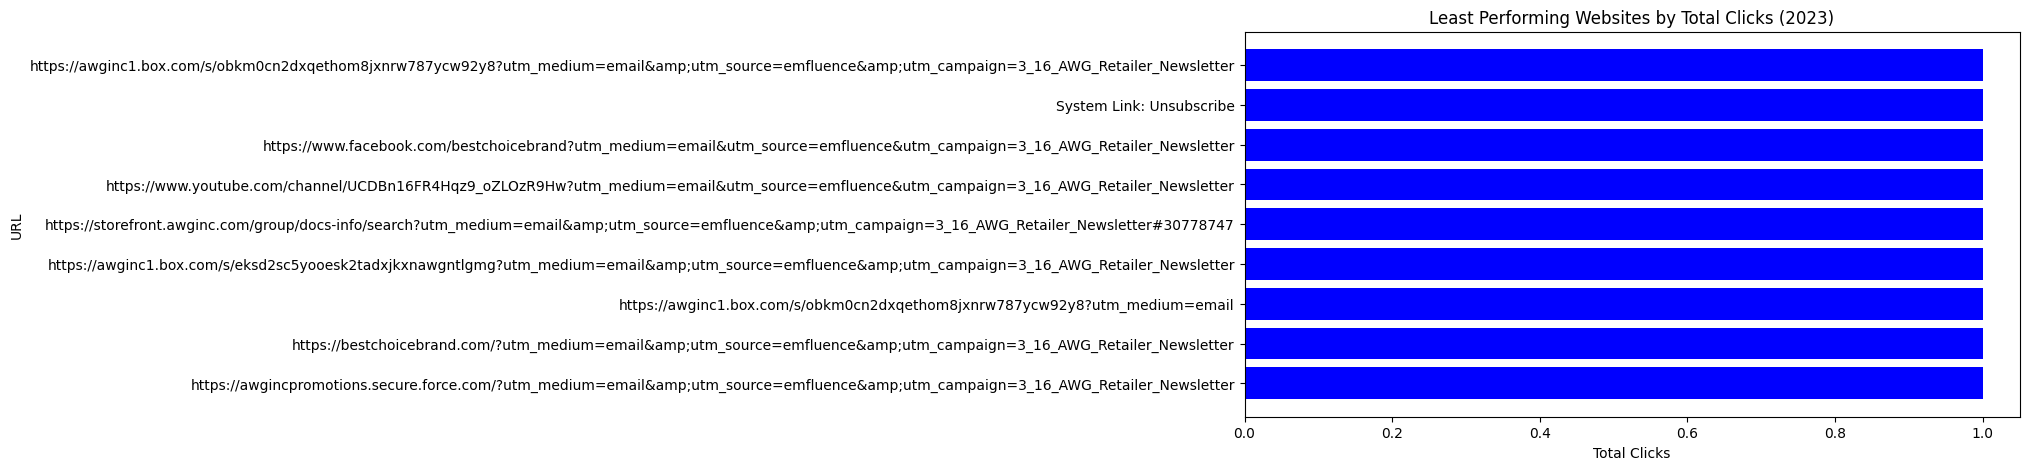

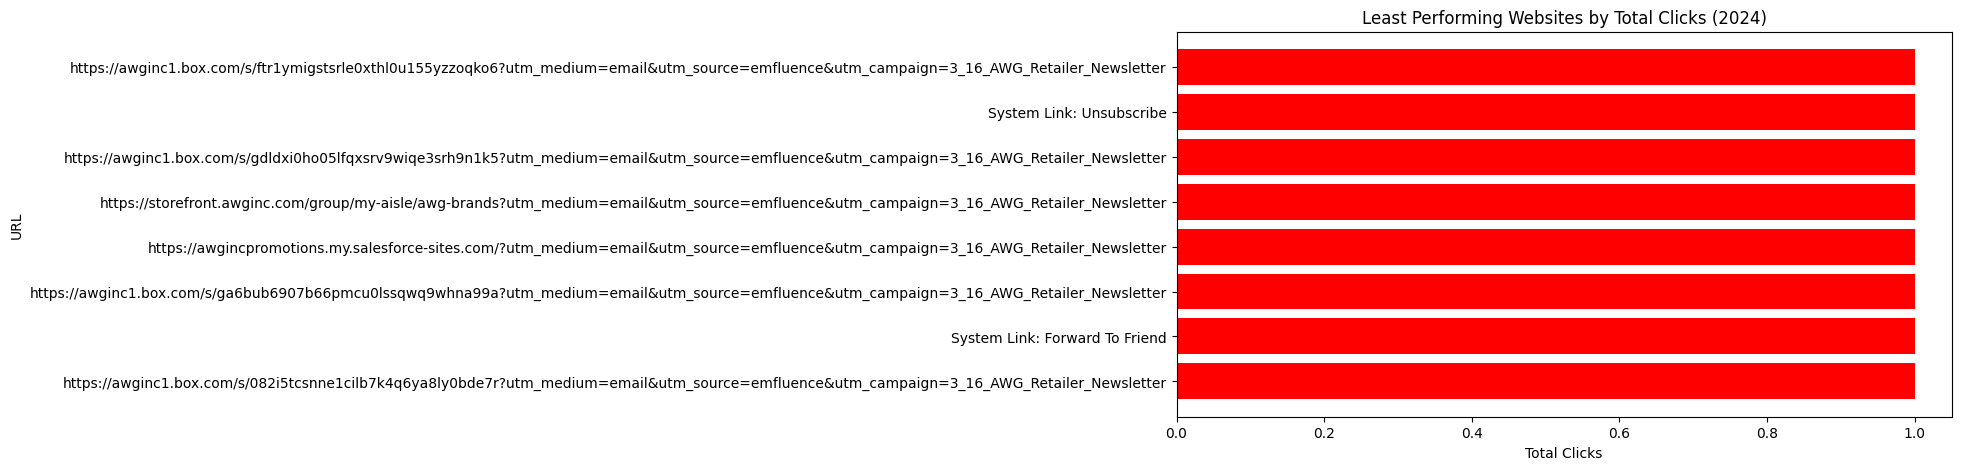

In [ ]:
import matplotlib.pyplot as plt

# Plot for 2023
plt.figure(figsize=(10, 5))
plt.barh(least_10_2023['URL'], least_10_2023['Total Clicks'], color='blue')
plt.xlabel("Total Clicks")
plt.ylabel("URL")
plt.title("Least Performing Websites by Total Clicks (2023)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Plot for 2024
plt.figure(figsize=(10, 5))
plt.barh(least_10_2024['URL'], least_10_2024['Total Clicks'], color='red')
plt.xlabel("Total Clicks")
plt.ylabel("URL")
plt.title("Least Performing Websites by Total Clicks (2024)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
